<a href="https://colab.research.google.com/github/devkhetan/ML-Internship/blob/master/ML_Internship_Project(B)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
# Importing required libraries.
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
%matplotlib inline 
sns.set(color_codes=True)

In [4]:
#reading Data in python
df = pd.read_csv("data.csv")
# To display the top 5 rows
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
# To display the bottom 5 rows
df.tail(5) 

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [6]:
# Checking the data type
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [7]:
#Dropping the uneccessary Columns
df = df.drop(['Market Category' , 'Number of Doors','Engine Fuel Type'] , axis = 1)

In [8]:
#Renaming the Columns
df.rename(columns={'Engine HP':'HP','Engine Cylinders':'Cylinders','Transmission Type':'Transmission','Driven_Wheels':'Drive Mode','highway MPG':'MPG-H','city mpg':'MPG-C','MSRP':'MRP'},inplace = True)

In [9]:
# Total number of rows and columns
df.shape

(11914, 13)

In [10]:
# Rows containing duplicate data
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

         Make     Model  Year     HP  ...  MPG-H MPG-C Popularity    MRP
14        BMW  1 Series  2013  230.0  ...     28    19       3916  31500
18       Audi       100  1992  172.0  ...     24    17       3105   2000
20       Audi       100  1992  172.0  ...     24    17       3105   2000
24       Audi       100  1993  172.0  ...     24    17       3105   2000
25       Audi       100  1993  172.0  ...     24    17       3105   2000
...       ...       ...   ...    ...  ...    ...   ...        ...    ...
11481  Suzuki      X-90  1998   95.0  ...     26    22        481   2000
11603   Volvo      XC60  2017  302.0  ...     29    20        870  46350
11604   Volvo      XC60  2017  240.0  ...     30    23        870  40950
11708  Suzuki       XL7  2008  252.0  ...     22    15        481  29149
11717  Suzuki       XL7  2008  252.0  ...     22    16        481  27499

[792 rows x 13 columns]


In [11]:
# Used to count the number of rows before removing the data
df.count() 

Make             11914
Model            11914
Year             11914
HP               11845
Cylinders        11884
Transmission     11914
Drive Mode       11914
Vehicle Size     11914
Vehicle Style    11914
MPG-H            11914
MPG-C            11914
Popularity       11914
MRP              11914
dtype: int64

In [12]:
# Dropping the duplicates 
df = df.drop_duplicates()
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,MRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


In [13]:
# Counting the number of rows after removing duplicates.
df.count()

Make             11122
Model            11122
Year             11122
HP               11053
Cylinders        11092
Transmission     11122
Drive Mode       11122
Vehicle Size     11122
Vehicle Style    11122
MPG-H            11122
MPG-C            11122
Popularity       11122
MRP              11122
dtype: int64

In [14]:
# Finding the null values.
print(df.isnull().sum())

Make              0
Model             0
Year              0
HP               69
Cylinders        30
Transmission      0
Drive Mode        0
Vehicle Size      0
Vehicle Style     0
MPG-H             0
MPG-C             0
Popularity        0
MRP               0
dtype: int64


In [15]:
# Dropping the missing values.
df = df.dropna() 
df.count()

Make             11024
Model            11024
Year             11024
HP               11024
Cylinders        11024
Transmission     11024
Drive Mode       11024
Vehicle Size     11024
Vehicle Style    11024
MPG-H            11024
MPG-C            11024
Popularity       11024
MRP              11024
dtype: int64

In [16]:
# After dropping the values
print(df.isnull().sum()) 

Make             0
Model            0
Year             0
HP               0
Cylinders        0
Transmission     0
Drive Mode       0
Vehicle Size     0
Vehicle Style    0
MPG-H            0
MPG-C            0
Popularity       0
MRP              0
dtype: int64


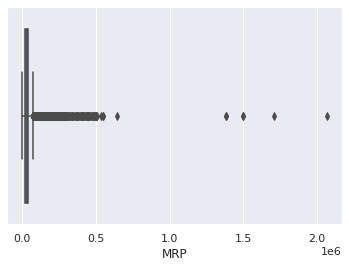

In [17]:
#Plotting Graphs of Data(Columns)
sns.boxplot(x=df['MRP'])

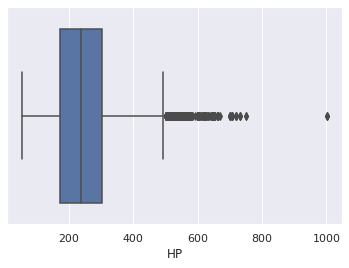

In [18]:
sns.boxplot(x=df['HP'])

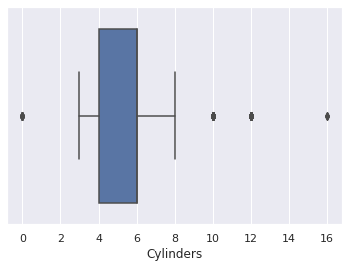

In [19]:
sns.boxplot(x=df['Cylinders'])

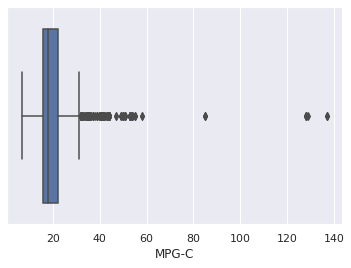

In [20]:
sns.boxplot(x=df['MPG-C'])

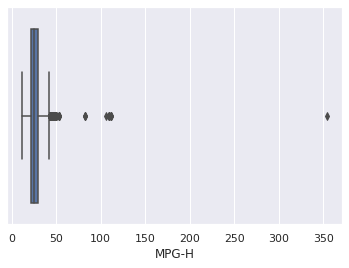

In [21]:
sns.boxplot(x=df['MPG-H'])

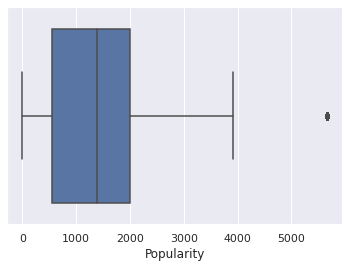

In [22]:
sns.boxplot(x=df['Popularity'])

In [23]:
#Finding IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year              9.00
HP              131.00
Cylinders         2.00
MPG-H             8.00
MPG-C             6.00
Popularity     1460.00
MRP           21426.25
dtype: float64


In [24]:
#Removing Outliners
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

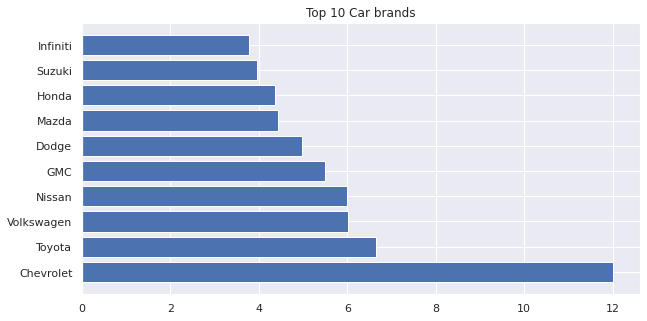

In [25]:
# Percentage of car per brand
counts = df['Make'].value_counts()*100/sum(df['Make'].value_counts())

# Top 10 car brands
popular_labels = counts.index[:10]
    
# Plot
plt.figure(figsize=(10,5))
plt.barh(popular_labels, width=counts[:10])
plt.title('Top 10 Car brands')
plt.show()

In [26]:
prices = df[['Make','MRP']].loc[(df['Make'] == 'Chevrolet')|
               (df['Make'] == 'Ford')|
               (df['Make'] == 'Volkswagen')|
               (df['Make'] == 'Toyota')|
               (df['Make'] == 'Dodge')|
               (df['Make'] == 'Nissan')|
               (df['Make'] == 'GMC')|
               (df['Make'] == 'Honda')|
               (df['Make'] == 'Mazda')].groupby('Make').mean()
print(prices)

                     MRP
Make                    
Chevrolet   28142.855891
Dodge       26076.722353
GMC         33261.400853
Honda       27381.364611
Mazda       20495.820106
Nissan      28352.543860
Toyota      27769.421793
Volkswagen  29032.817476


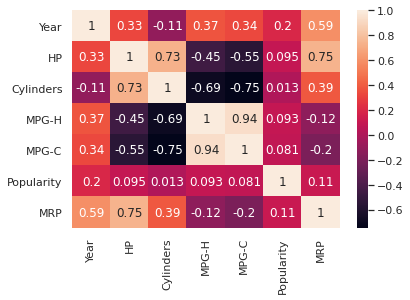

In [27]:
#Plotting Correlation Matrix
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)

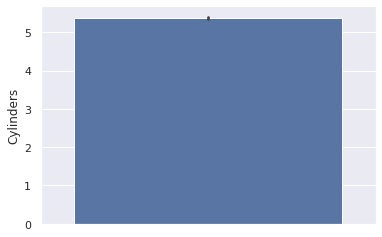

In [28]:
sns.barplot(y=df['Cylinders'])

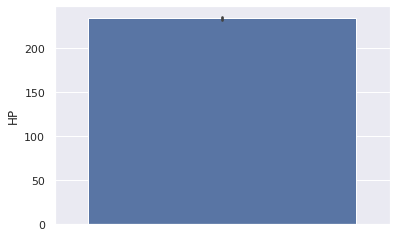

In [29]:
sns.barplot(y=df['HP'])

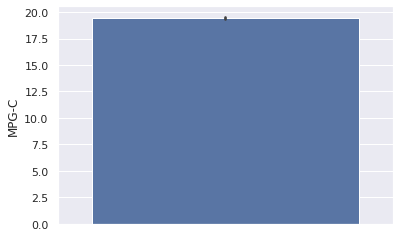

In [30]:
sns.barplot(y=df['MPG-C'])

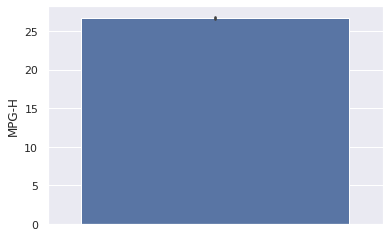

In [31]:
sns.barplot(y=df['MPG-H'])

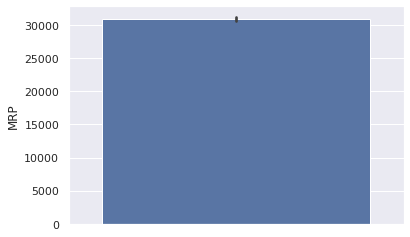

In [32]:
sns.barplot(y=df['MRP'])

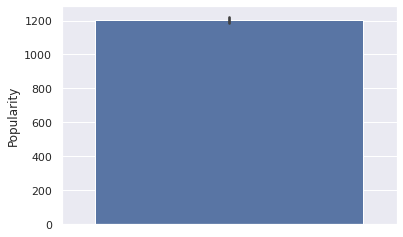

In [33]:
sns.barplot(y=df['Popularity'])

In [41]:
y = df['MRP']

In [42]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print(X_train.shape, y_train.shape) 
print(X_test.shape, y_test.shape) 

(6836, 13) (6836,)
(1710, 13) (1710,)
